In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math

In [6]:
Pk = np.load('/Users/boris/Work/CLASS-SZ/SO-SZ/N5K/input/pk.npz')

In [11]:
Pk.files

['k', 'z', 'pk_nl', 'pk_lin']

In [23]:
Pk['z']

array([0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
       0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
       0.71428571, 0.78571429, 0.85714286, 0.92857143, 1.        ,
       1.07142857, 1.14285714, 1.21428571, 1.28571429, 1.35714286,
       1.42857143, 1.5       , 1.57142857, 1.64285714, 1.71428571,
       1.78571429, 1.85714286, 1.92857143, 2.        , 2.07142857,
       2.14285714, 2.21428571, 2.28571429, 2.35714286, 2.42857143,
       2.5       , 2.57142857, 2.64285714, 2.71428571, 2.78571429,
       2.85714286, 2.92857143, 3.        , 3.07142857, 3.14285714,
       3.21428571, 3.28571429, 3.35714286, 3.42857143, 3.5       ])

In [13]:
np.shape(Pk['pk_nl'])

(50, 200)

In [14]:
np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/n5k_pk_nl.txt',Pk['pk_nl'])

In [15]:
np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/n5k_k.txt',Pk['k'])

In [16]:
np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/n5k_z.txt',Pk['z'])

In [34]:
pkz = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/n5k_pk_nl.txt')
np.shape(pkz)

(50, 200)

In [37]:
pkz_k = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/n5k_k.txt')
np.shape(pkz_k)


(200,)

In [38]:
pkz_z = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/n5k_z.txt')
np.shape(pkz_z)

(50,)

In [17]:
Ks = np.load('/Users/boris/Work/CLASS-SZ/SO-SZ/N5K/input/kernels_fullwidth.npz')
Ks.files

['z_cl', 'chi_cl', 'kernels_cl', 'z_sh', 'chi_sh', 'kernels_sh']

In [19]:
np.shape(Ks['kernels_cl'])

(10, 2000)

In [20]:
np.shape(Ks['z_cl'])

(2000,)

In [31]:
np.shape(Ks['kernels_sh'])

(5, 2000)

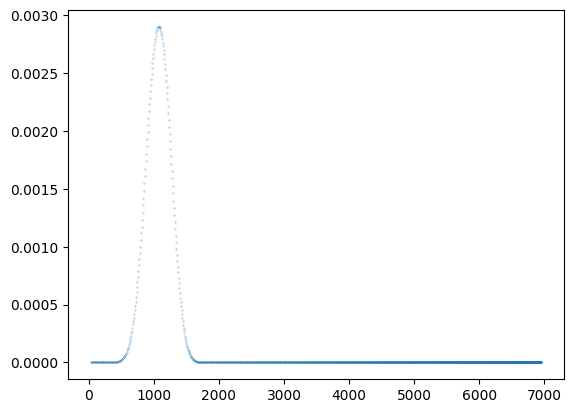

In [45]:
plt.plot(Ks['chi_cl'],Ks['kernels_cl'][0],marker='o',ls='None',markersize=0.2)

In [41]:
for i in range(10):
    np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/n5k_gg_chi_K%d.txt'%i,np.c_[Ks['chi_cl'],Ks['kernels_cl'][i]])

In [43]:
for i in range(5):
    np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/n5k_ss_chi_K%d.txt'%i,np.c_[Ks['chi_sh'],Ks['kernels_sh'][i]])

In [25]:
Ks['chi_cl']

array([  25.96064105,   33.71271985,   41.45840015, ..., 6952.86614787,
       6954.30233692, 6955.73771953])

In [26]:
np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/n5k_z_chi.txt',
           np.c_[Ks['z_cl'],Ks['chi_cl']]
          )

In [28]:
np.sum(Ks['chi_cl']-Ks['chi_sh'])

0.0

In [29]:
np.sum(Ks['z_cl']-Ks['z_sh'])

0.0

In [46]:
Ks['z_cl']

array([0.00583333, 0.00757837, 0.00932341, ..., 3.49067592, 3.49242096,
       3.494166  ])

In [47]:
Ks['chi_cl']

array([  25.96064105,   33.71271985,   41.45840015, ..., 6952.86614787,
       6954.30233692, 6955.73771953])

In [48]:
clgg = np.load('/Users/boris/Work/CLASS-SZ/SO-SZ/N5K/tests/benchmarks_nl_clgg.npz')

In [51]:
np.shape(clgg['cls'])

(55, 103)

In [52]:
np.shape(clgg['ls'])

(103,)

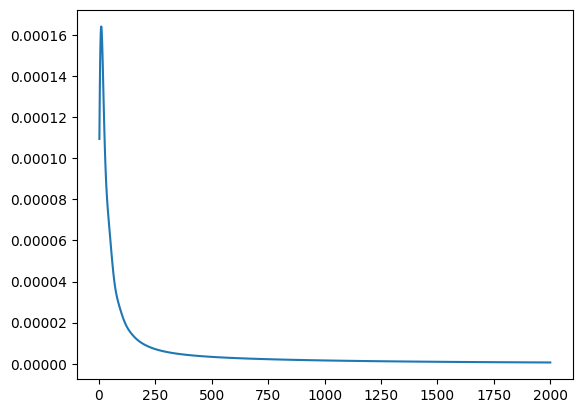

In [57]:
plt.plot(clgg['ls'],clgg['cls'][0])

In [161]:
l_csz = l_csz
cls_csz = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/output/class_sz_test_n5k05_n5k_F.txt')
np.shape(cls_csz)

(103,)

/var/folders/h0/4_tf3pcn1h32ks9grh325v400000gn/T/ipykernel_64321/3920329121.py:5: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,2200)


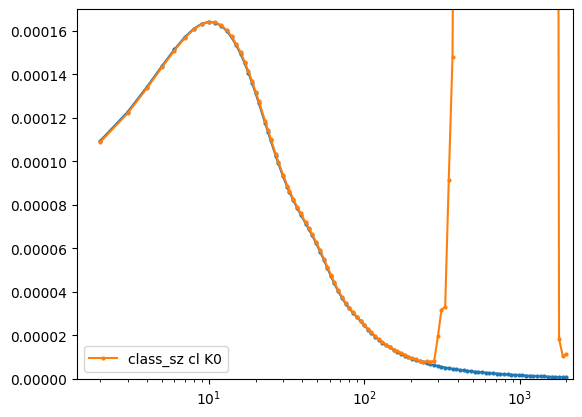

In [163]:
plt.plot(clgg['ls'],clgg['cls'][0],marker='o',markersize=2.)
plt.plot(l_csz,cls_csz,marker='o',markersize=2.,label='class_sz cl K0')
plt.xscale('log')
plt.ylim(0,1.7e-4)
plt.xlim(0,2200)
plt.legend()

In [93]:
clgg['cls'][0]/cls_csz

array([1.63445458e+01, 1.63144588e+01, 1.62793815e+01, 1.62416905e+01,
       1.62042289e+01, 1.61678925e+01, 1.61307159e+01, 1.60886160e+01,
       1.60440349e+01, 1.60067460e+01, 1.59694172e+01, 1.59219603e+01,
       1.58848435e+01, 1.58514109e+01, 1.58039339e+01, 1.57766556e+01,
       1.57411551e+01, 1.57050177e+01, 1.56873578e+01, 1.56502275e+01,
       1.56132078e+01, 1.56017639e+01, 1.55928338e+01, 1.55843570e+01,
       1.55736742e+01, 1.55812484e+01, 1.55971971e+01, 1.56183051e+01,
       1.56373719e+01, 1.56529308e+01, 1.56613168e+01, 1.56530107e+01,
       1.56409829e+01, 1.56194818e+01, 1.55593257e+01, 1.54988298e+01,
       1.54415417e+01, 1.53859141e+01, 1.53389716e+01, 1.53114437e+01,
       1.53182604e+01, 1.53418283e+01, 1.53844639e+01, 1.54330814e+01,
       1.54582892e+01, 1.54576894e+01, 1.54289457e+01, 1.53847869e+01,
       1.53424514e+01, 1.53156479e+01, 1.53230146e+01, 1.53389659e+01,
       1.53696050e+01, 1.53907313e+01, 1.53876418e+01, 1.53698518e+01,
      

In [64]:
len(clgg['ls'])

103